1. [Data overview](#dataoverview)
* [Data exploration](#exp)
* [Data preprocessing](#preprocessing)
* [Random Forest classifier](#rf)
* [XGBoost classifier](#xgb)

In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = 200
pd.options.display.max_columns = 100

from numpy import set_printoptions
set_printoptions(precision=3)

In [110]:
df_train = pd.read_csv('https://raw.githubusercontent.com/s-totally/Kaggle-Titanic/master/titanictrain.csv')

In [111]:
df_test = pd.read_csv('https://raw.githubusercontent.com/s-totally/Kaggle-Titanic/master/titanictest.csv')

In [47]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


## <a name='dataoverview'> Data overview </a>

__Variables__ 
1. _Survived_: 
* _Pclass_: 1st (Upper class), 2nd (Middle class), 3rd (Lower class) 
* _Name_:
* _Sex_:
* _Age_:
* _SibSp_: Whether travelled with a Sibling/Spouse 
* _Parch_: Whether traveled with a parent or a child 
* _Ticket_:
* _Fare_: 
* _Cabin_: 
* _Embarked_:

In [8]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## <a name="dataexploration"> Data exploration </a>

In [10]:
# How many missing values? 

df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

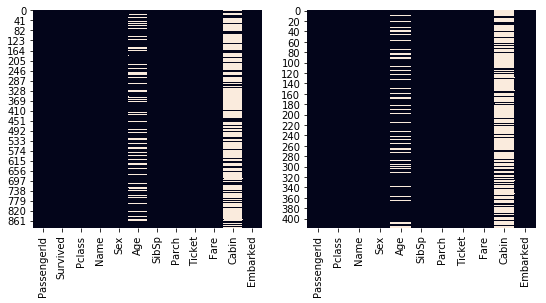

In [18]:
fig, ax = plt.subplots(1,2, figsize = (2*4.5, 1*4)) # ax variable is a 2x2 numpy array. Call each one by one 
sns.heatmap(df_train.isnull(), ax=ax[0], cbar=False)
sns.heatmap(df_test.isnull(), ax=ax[1], cbar=False)
plt.show()

### Visualing variable relationships 

Histogram of each of the variables

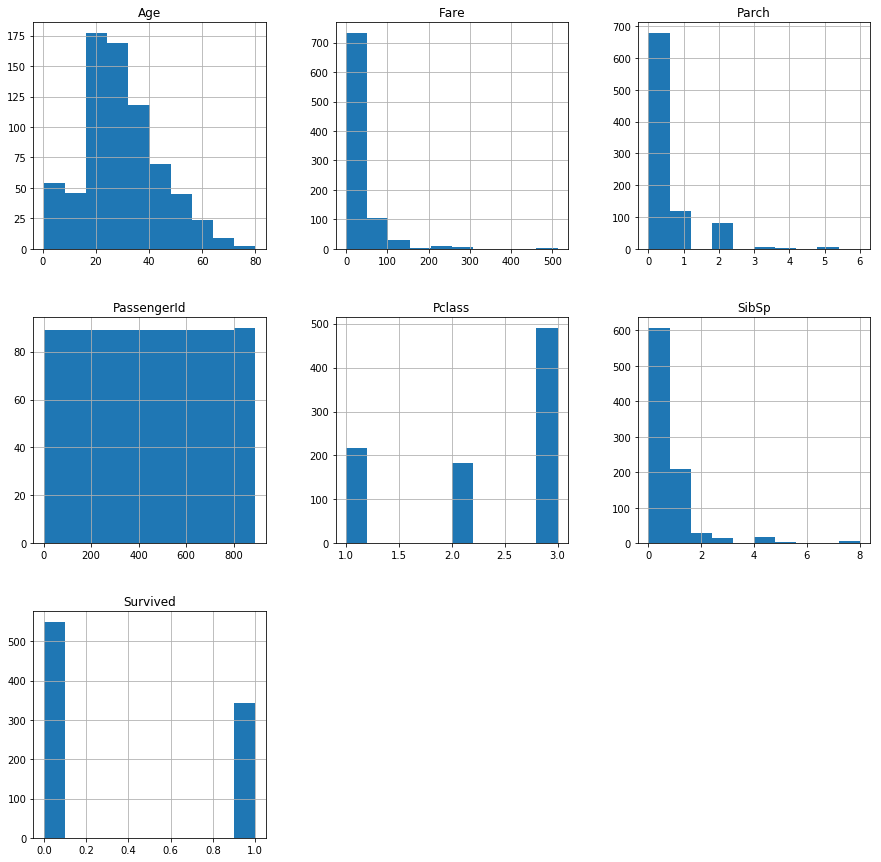

In [22]:
df_train.hist(figsize=(15,15));

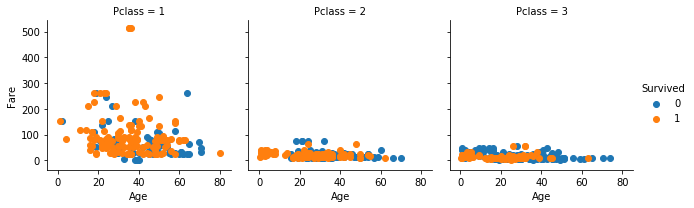

In [14]:
ax = sns.FacetGrid(data=df_train, col='Pclass', hue='Survived')
ax = ax.map(plt.scatter, 'Age', 'Fare').add_legend()

In [29]:
cat_cols = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

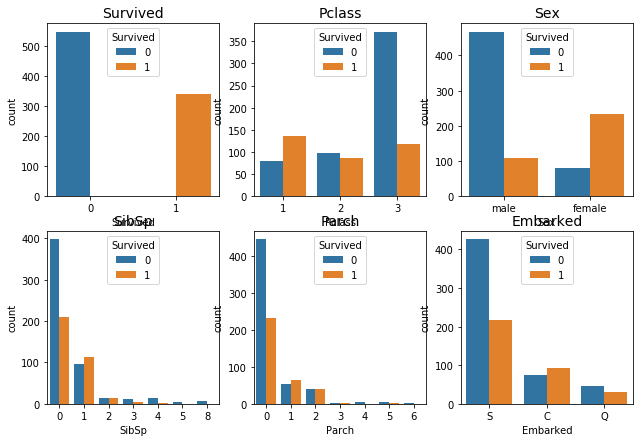

In [31]:
n_rows, n_cols = 2, 3

fig, axs = plt.subplots(n_rows, n_cols, figsize = (n_cols*3.5, n_rows*3.5))
b
# For each of the 2 rows, 3 cols (i.e. 6 plots)
for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c 
        ax = axs[r][c]
        sns.countplot(df_train[cat_cols[i]], hue=df_train['Survived'], ax=ax)
        ax.set_title(cat_cols[i], fontsize=14)
        ax.legend(title='Survived', loc='upper center')
plt.show()

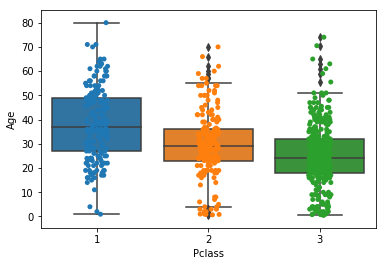

In [18]:
# Boxplots 
ax = sns.boxplot(data=df_train, x='Pclass', y='Age')
ax = sns.stripplot('Pclass', 'Age', data=df_train, jitter=True);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


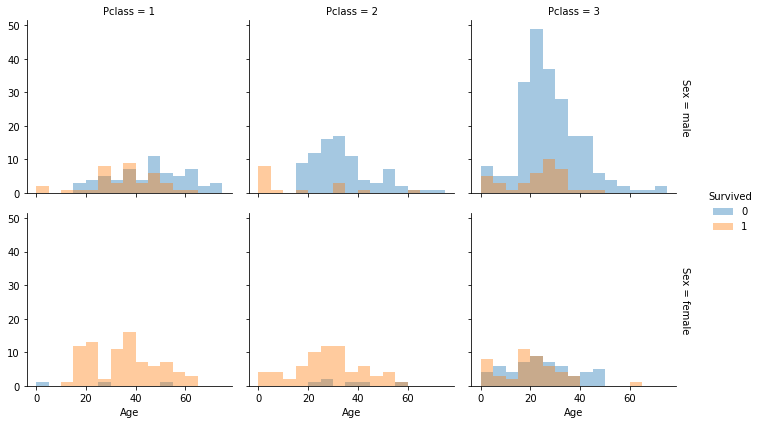

In [40]:
# Refer: https://seaborn.pydata.org/tutorial/axis_grids.html
bins = np.arange(0, 80, 5)

g = sns.FacetGrid(data=df_train, row='Sex', col='Pclass', hue='Survived', margin_titles=True, size=3, aspect=1.1)
g.map(sns.distplot, 'Age', bins=bins, kde=False)
g.add_legend()
plt.show()

Best chances to survive for male passengers was in Pclass 1 or being below 5 years old.
Lowest survival rate for female passengers was in Pclass 3 and being older than 40.
Most passengers were male, in Pclass 3 and between 15-35 years old.

What does the distribution for survived passengers look like

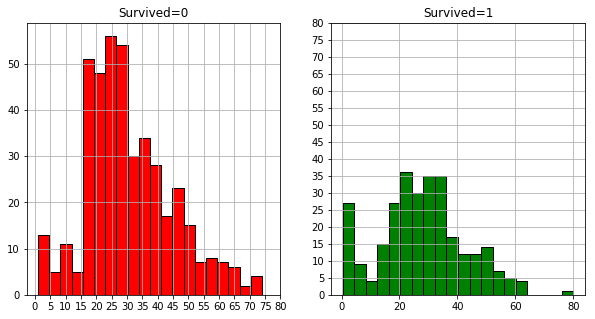

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
df_train[df_train['Survived']==0].Age.hist(ax=ax[0], bins=20, color='red', edgecolor='black')
df_train[df_train['Survived']==1].Age.hist(ax=ax[1], bins=20, color='green', edgecolor='black')
ax[0].set_title('Survived=0'); ax[1].set_title('Survived=1');
tick_list = range(0, 85, 5)
ax[0].set_xticks(tick_list); ax[1].set_yticks(tick_list);

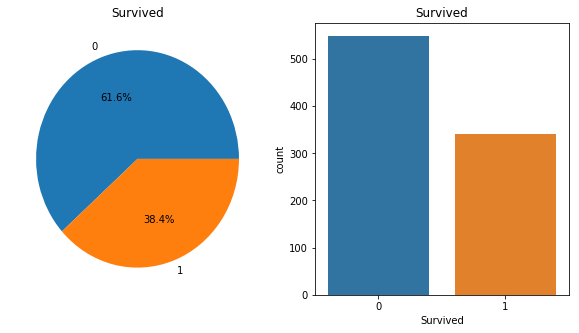

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
df_train['Survived'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0])
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[0].set_title('Survived'); ax[1].set_title('Survived')
ax[0].set_ylabel('');

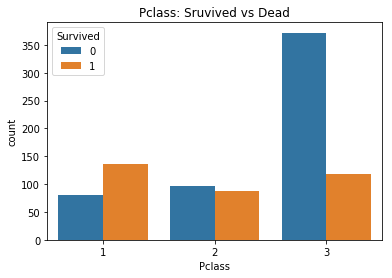

In [38]:
sns.countplot('Pclass', hue='Survived', data=df_train)
plt.title('Pclass: Sruvived vs Dead')
plt.show()

In [ ]:
df_train.columns

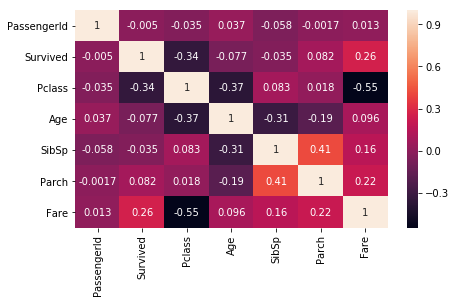

In [40]:
plt.figure(figsize=(7,4)) 
sns.heatmap(df_train.corr(),annot=True);#,cmap='cubehelix_r')

## <a name='exp'> Data exploration </a>

In [6]:
#shape
print(df_train.shape)

(891, 12)


In [7]:
# size, rows*columns
print(df_train.size)

10692


In [8]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# Column types and their respective counts 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [11]:
df_train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
699,700,0,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",male,42.00,0,0,348121,7.65,F G63,S
732,733,0,2,"Knight, Mr. Robert J",male,nan,0,0,239855,0.00,NaN,S
467,468,0,1,"Smart, Mr. John Montgomery",male,56.00,0,0,113792,26.55,NaN,S
401,402,0,3,"Adams, Mr. John",male,26.00,0,0,341826,8.05,NaN,S
209,210,1,1,"Blank, Mr. Henry",male,40.00,0,0,112277,31.00,A31,C


In [13]:
# Statistical summary of the data 
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


In [14]:
df_train.loc[df_train['Age']==30].head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
79,80,1,3,"Dowdell, Miss. Elizabeth",female,30.00,0,0,364516,12.47,NaN,S
157,158,0,3,"Corn, Mr. Harry",male,30.00,0,0,SOTON/OQ 392090,8.05,NaN,S


## <a name='preprocessing'> Data preprocessing </a>

#### Separate the data into dependent and independent variable

Function to simplify columns

In [76]:
def simplify_ages(df):
    df['Age'] = df['Age'].fillna(-0.5) # Fill missing values with -0.5 so that first bin can be 'unknown'
    bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)# Create bins for age groups 
    labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young adult', 'Adult', 'Senior citizen'] # Create a label for each bin
    categories = pd.cut(df['Age'], bins, labels=labels) # Create a series for the age category
    df['Age'] = categories #Replace the age column with the new category created 
    return df

In [77]:
def simplify_cabin(df):
    df['Cabin'] = df['Cabin'].fillna('N').apply(lambda x: x[0])
    return df   

In [78]:
def simplify_fares(df):
    df['Fare'] = df['Fare'].fillna(-0.5)
    bins = (-1, 0, 8, 15, 31, 600)
    group_names = ['Unknown', '1st_quartile', '2nd_quartile', '3rd_quartile', '4th_quartile']
    fares = pd.cut(df['Fare'], bins=bins, labels=group_names)
    df['Fare'] = fares
    return df

In [79]:
def format_name(df):
    df['LastName'] = df['Name'].apply(lambda x: x.split(' ')[0])
    df['NamePrefix'] = df['Name'].apply(lambda x: x.split(' ')[1])
    return df

In [80]:
def drop_cols(df):
    df = df.drop(['Name', 'Ticket', 'Embarked'], axis=1)
    return df

In [40]:
# # Replace missing values in 'Embarked' column with mode of that column, i.e. S (Southampton) 
# from scipy.stats import mode
# print(mode(df_train['Embarked'].dropna())[0][0])
# mode_embarked = mode(df_train['Embarked'].dropna())[0][0]
# df_train['Embarked'] = df_train['Embarked'].fillna(mode_embarked)

In [81]:
def transform_features(df):
    df = simplify_ages(df)
    df = simplify_cabin(df)
    df = simplify_fares(df)
    df = format_name(df)
    df = drop_cols(df)
    return df

In [112]:
df_train = transform_features(df_train)
df_test = transform_features(df_test)
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,LastName,NamePrefix
0,1,0,3,male,Student,1,0,1st_quartile,N,"Braund,",Mr.
1,2,1,1,female,Adult,1,0,4th_quartile,C,"Cumings,",Mrs.
2,3,1,3,female,Young adult,0,0,1st_quartile,N,"Heikkinen,",Miss.
3,4,1,1,female,Young adult,1,0,4th_quartile,C,"Futrelle,",Mrs.
4,5,0,3,male,Young adult,0,0,2nd_quartile,N,"Allen,",Mr.


In [86]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,LastName,NamePrefix
0,1,0,3,male,Student,1,0,1st_quartile,N,"Braund,",Mr.
1,2,1,1,female,Adult,1,0,4th_quartile,C,"Cumings,",Mrs.
2,3,1,3,female,Young adult,0,0,1st_quartile,N,"Heikkinen,",Miss.
3,4,1,1,female,Young adult,1,0,4th_quartile,C,"Futrelle,",Mrs.
4,5,0,3,male,Young adult,0,0,2nd_quartile,N,"Allen,",Mr.


In [103]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [120]:
def encode_features(train_data, test_data):
    features = ['Sex', 'Age', 'Fare', 'Cabin', 'LastName', 'NamePrefix']
    data_combined = pd.concat([train_data, test_data], axis=0)
    
    for f in features:
        le = LabelEncoder()
        le = le.fit(data_combined[f])
        train_data[f] = le.transform(train_data[f])
        test_data[f] = le.transform(test_data[f])
    return train_data, test_data

## <a name='rf'> Random Forest classifier </a>

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV

In [126]:
df_train, df_test = encode_features(df_train, df_test)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [127]:
X = df_train.drop(['PassengerId', 'Survived'], axis=1)
y = df_train['Survived']

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [129]:
rfc = RandomForestClassifier()

In [130]:
param_grid = {'n_estimators':[4,6,9],
             'max_features':['log2', 'sqrt', 'auto'],
             'criterion':['entropy', 'gini'],
             'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5],
             'min_samples_leaf':[1,5,8]}

In [131]:
grid_search = GridSearchCV(rfc, param_grid, cv=5, verbose=3)

In [133]:
grid_search = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
[CV] criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=4 
[CV]  criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=4, score=0.768000 -   0.0s
[CV] criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=4 
[CV]  criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=4, score=0.816000 -   0.0s
[CV] criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=4 
[CV]  criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=4, score=0.816000 -   0.0s
[CV] criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=4 
[CV]  criterion=entropy, max_depth=2, max_features=log2, min_samples_l

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=6, score=0.806452 -   0.0s
[CV] criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=6 
[CV]  criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=6, score=0.774194 -   0.0s
[CV] criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=9 
[CV]  criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=9, score=0.760000 -   0.0s
[CV] criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=9 
[CV]  criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=9, score=0.816000 -   0.0s
[CV] criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators

[CV] criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=4 
[CV]  criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=4, score=0.782258 -   0.0s
[CV] criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=6 
[CV]  criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=6, score=0.736000 -   0.0s
[CV] criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=6 
[CV]  criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=6, score=0.784000 -   0.0s
[CV] criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=6 
[CV]  criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=6, score=0.800000 -   0

[CV]  criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=9, score=0.792000 -   0.0s
[CV] criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=9 
[CV]  criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=9, score=0.816000 -   0.0s
[CV] criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=9 
[CV]  criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=9, score=0.774194 -   0.0s
[CV] criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=9 
[CV]  criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=9, score=0.798387 -   0.0s
[CV] criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators

[CV] criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=9 
[CV]  criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=9, score=0.760000 -   0.0s
[CV] criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=9 
[CV]  criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=9, score=0.792000 -   0.0s
[CV] criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=9 
[CV]  criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=9, score=0.816000 -   0.0s
[CV] criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=9 
[CV]  criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=9, score=0.798387 -   0

[CV]  criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=6, score=0.806452 -   0.0s
[CV] criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=9 
[CV]  criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=9, score=0.768000 -   0.0s
[CV] criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=9 
[CV]  criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=9, score=0.800000 -   0.0s
[CV] criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=9 
[CV]  criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=9, score=0.808000 -   0.0s
[CV] criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators

[CV]  criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=9, score=0.808000 -   0.0s
[CV] criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=9 
[CV]  criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=9, score=0.782258 -   0.0s
[CV] criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=9 
[CV]  criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=9, score=0.717742 -   0.0s
[CV] criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=4 
[CV]  criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=4, score=0.736000 -   0.0s
[CV] criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators

[CV]  criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=4, score=0.776000 -   0.0s
[CV] criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=4 
[CV]  criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=4, score=0.808000 -   0.0s
[CV] criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=4 
[CV]  criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=4, score=0.800000 -   0.0s
[CV] criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=4 
[CV]  criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=4, score=0.782258 -   0.0s
[CV] criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators

[CV]  criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=9, score=0.800000 -   0.0s
[CV] criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=9 
[CV]  criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=9, score=0.816000 -   0.0s
[CV] criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=9 
[CV]  criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=9, score=0.782258 -   0.0s
[CV] criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=9 
[CV]  criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=9, score=0.741935 -   0.0s
[CV] criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators

[CV]  criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=6, score=0.782258 -   0.0s
[CV] criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=6 
[CV]  criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=6, score=0.685484 -   0.0s
[CV] criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=9 
[CV]  criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=9, score=0.744000 -   0.0s
[CV] criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=9 
[CV]  criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=9, score=0.800000 -   0.0s
[CV] criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators

[CV]  criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=9, score=0.800000 -   0.0s
[CV] criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=9 
[CV]  criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=9, score=0.824000 -   0.0s
[CV] criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=9 
[CV]  criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=9, score=0.782258 -   0.0s
[CV] criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=9 
[CV]  criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=9, score=0.814516 -   0.0s
[CV] criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators

[CV]  criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=6, score=0.685484 -   0.0s
[CV] criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=6 
[CV]  criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=6, score=0.798387 -   0.0s
[CV] criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=9 
[CV]  criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=9, score=0.808000 -   0.0s
[CV] criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=9 
[CV]  criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=9, score=0.792000 -   0.0s
[CV] criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators

[CV]  criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=9, score=0.816000 -   0.0s
[CV] criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=9 
[CV]  criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=9, score=0.824000 -   0.0s
[CV] criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=9 
[CV]  criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=9, score=0.846774 -   0.0s
[CV] criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=9 
[CV]  criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=9, score=0.822581 -   0.0s
[CV] criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators

[CV]  criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=6, score=0.782258 -   0.0s
[CV] criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=9 
[CV]  criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=9, score=0.728000 -   0.0s
[CV] criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=9 
[CV]  criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=9, score=0.832000 -   0.0s
[CV] criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=9 
[CV]  criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=9, score=0.800000 -   0.0s
[CV] criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators

[CV]  criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=6, score=0.824000 -   0.0s
[CV] criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=6 
[CV]  criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=6, score=0.768000 -   0.0s
[CV] criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=6 
[CV]  criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=6, score=0.782258 -   0.0s
[CV] criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=6 
[CV]  criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=6, score=0.733871 -   0.0s
[CV] criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators

[CV]  criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=4, score=0.782258 -   0.0s
[CV] criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=6 
[CV]  criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=6, score=0.776000 -   0.0s
[CV] criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=6 
[CV]  criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=6, score=0.776000 -   0.0s
[CV] criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=6 
[CV]  criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=6, score=0.808000 -   0.0s
[CV] criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators

[CV]  criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=9, score=0.792000 -   0.0s
[CV] criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=9 
[CV]  criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=9, score=0.840000 -   0.0s
[CV] criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=9 
[CV]  criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=9, score=0.800000 -   0.0s
[CV] criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=9 
[CV]  criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=9, score=0.798387 -   0.0s
[CV] criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators

[CV]  criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=9, score=0.790323 -   0.0s
[CV] criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=9 
[CV]  criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=9, score=0.798387 -   0.0s
[CV] criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=4 
[CV]  criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=4, score=0.736000 -   0.0s
[CV] criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=4 
[CV]  criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=4, score=0.824000 -   0.0s
[CV] criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators

[CV]  criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=4, score=0.840000 -   0.0s
[CV] criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=4 
[CV]  criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=4, score=0.808000 -   0.0s
[CV] criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=4 
[CV]  criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=4, score=0.790323 -   0.0s
[CV] criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=4 
[CV]  criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=4, score=0.822581 -   0.0s
[CV] criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators

[CV]  criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=6, score=0.798387 -   0.0s
[CV] criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=6 
[CV]  criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=6, score=0.798387 -   0.0s
[CV] criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=9 
[CV]  criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=9, score=0.792000 -   0.0s
[CV] criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=9 
[CV]  criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=9, score=0.832000 -   0.0s
[CV] criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators

[CV]  criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=4, score=0.832000 -   0.0s
[CV] criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=4 
[CV]  criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=4, score=0.816000 -   0.0s
[CV] criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=4 
[CV]  criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=4, score=0.806452 -   0.0s
[CV] criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=4 
[CV]  criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=4, score=0.741935 -   0.0s
[CV] criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators

[CV]  criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=9, score=0.848000 -   0.0s
[CV] criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=9 
[CV]  criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=9, score=0.808000 -   0.0s
[CV] criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=9 
[CV]  criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=9, score=0.830645 -   0.0s
[CV] criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=9 
[CV]  criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=9, score=0.806452 -   0.0s
[CV] criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=3, n_estimators

[CV]  criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=6, score=0.792000 -   0.0s
[CV] criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=6 
[CV]  criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=6, score=0.832000 -   0.0s
[CV] criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=6 
[CV]  criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=6, score=0.816000 -   0.0s
[CV] criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=6 
[CV]  criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=6, score=0.814516 -   0.0s
[CV] criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators

[CV]  criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=9, score=0.816000 -   0.0s
[CV] criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=9 
[CV]  criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=9, score=0.806452 -   0.0s
[CV] criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=9 
[CV]  criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=9, score=0.750000 -   0.0s
[CV] criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=4 
[CV]  criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=4, score=0.776000 -   0.0s
[CV] criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators

[CV] criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=6 
[CV]  criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=6, score=0.808000 -   0.0s
[CV] criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=6 
[CV]  criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=6, score=0.782258 -   0.0s
[CV] criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=6 
[CV]  criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=6, score=0.798387 -   0.0s
[CV] criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=9 
[CV]  criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=9, score=0.792000 -   0

[CV]  criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=9, score=0.832000 -   0.0s
[CV] criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=9 
[CV]  criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=9, score=0.800000 -   0.0s
[CV] criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=9 
[CV]  criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=9, score=0.814516 -   0.0s
[CV] criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=9 
[CV]  criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=9, score=0.782258 -   0.0s
[CV] criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators

[CV]  criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=6, score=0.758065 -   0.0s
[CV] criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=9 
[CV]  criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=9, score=0.760000 -   0.0s
[CV] criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=9 
[CV]  criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=9, score=0.800000 -   0.0s
[CV] criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=9 
[CV]  criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=9, score=0.848000 -   0.0s
[CV] criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators

[CV] criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=4 
[CV]  criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=4, score=0.790323 -   0.0s
[CV] criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=6 
[CV]  criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=6, score=0.744000 -   0.0s
[CV] criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=6 
[CV]  criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=6, score=0.840000 -   0.0s
[CV] criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=6 
[CV]  criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=6, score=0.832000 -   0

[CV]  criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=9, score=0.792000 -   0.0s
[CV] criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=9 
[CV]  criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=9, score=0.824000 -   0.0s
[CV] criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=9 
[CV]  criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=9, score=0.792000 -   0.0s
[CV] criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=9 
[CV]  criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=9, score=0.782258 -   0.0s
[CV] criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators

[CV]  criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=6, score=0.792000 -   0.0s
[CV] criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=6 
[CV]  criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=6, score=0.840000 -   0.0s
[CV] criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=6 
[CV]  criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=6, score=0.824000 -   0.0s
[CV] criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=6 
[CV]  criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=6, score=0.814516 -   0.0s
[CV] criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators

[CV]  criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=9, score=0.806452 -   0.0s
[CV] criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=9 
[CV]  criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=9, score=0.774194 -   0.0s
[CV] criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=4 
[CV]  criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=4, score=0.736000 -   0.0s
[CV] criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=4 
[CV]  criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=4, score=0.776000 -   0.0s
[CV] criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators

[CV]  criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=9, score=0.752000 -   0.0s
[CV] criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=9 
[CV]  criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=9, score=0.816000 -   0.0s
[CV] criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=9 
[CV]  criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=9, score=0.808000 -   0.0s
[CV] criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=9 
[CV]  criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=9, score=0.830645 -   0.0s
[CV] criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators

[CV]  criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=6, score=0.808000 -   0.0s
[CV] criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=6 
[CV]  criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=6, score=0.808000 -   0.0s
[CV] criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=6 
[CV]  criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=6, score=0.814516 -   0.0s
[CV] criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=6 
[CV]  criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=6, score=0.798387 -   0.0s
[CV] criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators

[CV] criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=4 
[CV]  criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=4, score=0.768000 -   0.0s
[CV] criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=4 
[CV]  criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=4, score=0.840000 -   0.0s
[CV] criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=4 
[CV]  criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=4, score=0.864000 -   0.0s
[CV] criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=4 
[CV]  criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=4, score=0.7983

[CV] criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=9 
[CV]  criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=9, score=0.800000 -   0.0s
[CV] criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=9 
[CV]  criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=9, score=0.800000 -   0.0s
[CV] criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=9 
[CV]  criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=9, score=0.822581 -   0.0s
[CV] criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=9 
[CV]  criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=9, score=0.7822

[CV]  criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=6, score=0.824000 -   0.0s
[CV] criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=6 
[CV]  criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=6, score=0.832000 -   0.0s
[CV] criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=6 
[CV]  criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=6, score=0.774194 -   0.0s
[CV] criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=6 
[CV]  criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=6, score=0.758065 -   0.0s
[CV] criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_es

[CV]  criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=9, score=0.798387 -   0.0s
[CV] criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=4 
[CV]  criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=4, score=0.800000 -   0.0s
[CV] criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=4 
[CV]  criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=4, score=0.784000 -   0.0s
[CV] criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=4 
[CV]  criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=4, score=0.840000 -   0.0s
[CV] criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_es

[CV]  criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=9, score=0.768000 -   0.0s
[CV] criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=9 
[CV]  criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=9, score=0.816000 -   0.0s
[CV] criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=9 
[CV]  criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=9, score=0.824000 -   0.0s
[CV] criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=9 
[CV]  criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=9, score=0.782258 -   0.0s
[CV] criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_es

[CV]  criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=4, score=0.798387 -   0.0s
[CV] criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=6 
[CV]  criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=6, score=0.744000 -   0.0s
[CV] criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=6 
[CV]  criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=6, score=0.808000 -   0.0s
[CV] criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=6 
[CV]  criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=6, score=0.824000 -   0.0s
[CV] criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_es

[CV]  criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=6, score=0.808000 -   0.0s
[CV] criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=6 
[CV]  criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=6, score=0.814516 -   0.0s
[CV] criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=6 
[CV]  criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=6, score=0.766129 -   0.0s
[CV] criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=9 
[CV]  criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=9, score=0.776000 -   0.0s
[CV] criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_es

[CV]  criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=9, score=0.774194 -   0.0s
[CV] criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=4 
[CV]  criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=4, score=0.744000 -   0.0s
[CV] criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=4 
[CV]  criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=4, score=0.776000 -   0.0s
[CV] criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=4 
[CV]  criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=4, score=0.864000 -   0.0s
[CV] criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_es

[CV]  criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=9, score=0.808000 -   0.0s
[CV] criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=9 
[CV]  criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=9, score=0.808000 -   0.0s
[CV] criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=9 
[CV]  criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=9, score=0.798387 -   0.0s
[CV] criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=9 
[CV]  criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=9, score=0.814516 -   0.0s
[CV] criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_es

[CV] criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=3, n_estimators=4 
[CV]  criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=3, n_estimators=4, score=0.774194 -   0.0s
[CV] criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=3, n_estimators=6 
[CV]  criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=3, n_estimators=6, score=0.776000 -   0.0s
[CV] criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=3, n_estimators=6 
[CV]  criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=3, n_estimators=6, score=0.840000 -   0.0s
[CV] criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=3, n_estimators=6 
[CV]  criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=3, n_estimators=6, score=0.8240

[CV]  criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=9, score=0.728000 -   0.0s
[CV] criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=9 
[CV]  criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=9, score=0.832000 -   0.0s
[CV] criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=9 
[CV]  criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=9, score=0.816000 -   0.0s
[CV] criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=9 
[CV]  criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=9, score=0.782258 -   0.0s
[CV] criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=9 
[CV]  criterion=gini

[CV]  criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=6, score=0.790323 -   0.0s
[CV] criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=6 
[CV]  criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=6, score=0.782258 -   0.0s
[CV] criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=9 
[CV]  criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=9, score=0.728000 -   0.0s
[CV] criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=9 
[CV]  criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=9, score=0.800000 -   0.0s
[CV] criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=9 
[CV]  criterion=gini

[CV] criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=6 
[CV]  criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=6, score=0.824000 -   0.0s
[CV] criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=6 
[CV]  criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=6, score=0.816000 -   0.0s
[CV] criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=6 
[CV]  criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=6, score=0.808000 -   0.0s
[CV] criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=6 
[CV]  criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=6, score=0.758065 -   0.0s
[CV] criterion=gini,

[CV]  criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=6, score=0.774194 -   0.0s
[CV] criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=9 
[CV]  criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=9, score=0.784000 -   0.0s
[CV] criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=9 
[CV]  criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=9, score=0.816000 -   0.0s
[CV] criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=9 
[CV]  criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=9, score=0.800000 -   0.0s
[CV] criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=9 
[CV]  criterion=gini

[CV]  criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=9, score=0.790323 -   0.0s
[CV] criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=9 
[CV]  criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=9, score=0.782258 -   0.0s
[CV] criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=4 
[CV]  criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=4, score=0.688000 -   0.0s
[CV] criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=4 
[CV]  criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=4, score=0.784000 -   0.0s
[CV] criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=4 
[CV]  criterion=gini

[CV]  criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=4, score=0.814516 -   0.0s
[CV] criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=4 
[CV]  criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=4, score=0.774194 -   0.0s
[CV] criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=6 
[CV]  criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=6, score=0.784000 -   0.0s
[CV] criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=6 
[CV]  criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=6, score=0.792000 -   0.0s
[CV] criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=6 
[CV]  criterion=gini

[CV]  criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=6, score=0.792000 -   0.0s
[CV] criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=6 
[CV]  criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=6, score=0.758065 -   0.0s
[CV] criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=6 
[CV]  criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=6, score=0.830645 -   0.0s
[CV] criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=9 
[CV]  criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=9, score=0.744000 -   0.0s
[CV] criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=9 
[CV]  criterion=gini

[CV]  criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=9, score=0.814516 -   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=4 
[CV]  criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=4, score=0.736000 -   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=4 
[CV]  criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=4, score=0.792000 -   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=4 
[CV]  criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=4, score=0.792000 -   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=4 
[CV]  criterion=gini

[CV]  criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=9, score=0.808000 -   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=9 
[CV]  criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=9, score=0.758065 -   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=9 
[CV]  criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=9, score=0.806452 -   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=4 
[CV]  criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=4, score=0.776000 -   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=4 
[CV]  criterion=gini

[CV]  criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=9, score=0.736000 -   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=9 
[CV]  criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=9, score=0.824000 -   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=9 
[CV]  criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=9, score=0.808000 -   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=9 
[CV]  criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=9, score=0.766129 -   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=9 
[CV]  criterion=gini

[CV]  criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=6, score=0.774194 -   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=9 
[CV]  criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=9, score=0.768000 -   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=9 
[CV]  criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=9, score=0.776000 -   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=9 
[CV]  criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=9, score=0.808000 -   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=9 
[CV]  criterion=gini

[CV]  criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=6, score=0.798387 -   0.0s
[CV] criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=9 
[CV]  criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=9, score=0.752000 -   0.0s
[CV] criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=9 
[CV]  criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=9, score=0.800000 -   0.0s
[CV] criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=9 
[CV]  criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=9, score=0.824000 -   0.0s
[CV] criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=9 
[CV]  criterion=gini

[CV]  criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=6, score=0.798387 -   0.0s
[CV] criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=6 
[CV]  criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=6, score=0.774194 -   0.0s
[CV] criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=9 
[CV]  criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=9, score=0.752000 -   0.0s
[CV] criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=9 
[CV]  criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=9, score=0.832000 -   0.0s
[CV] criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=9 
[CV]  criterion=gini

[CV] criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=6 
[CV]  criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=6, score=0.776000 -   0.0s
[CV] criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=6 
[CV]  criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=6, score=0.824000 -   0.0s
[CV] criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=6 
[CV]  criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=6, score=0.800000 -   0.0s
[CV] criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=6 
[CV]  criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=6, score=0.790323 -   0.0s
[CV] criterion=gini,

[CV]  criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=4, score=0.752000 -   0.0s
[CV] criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=4 
[CV]  criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=4, score=0.808000 -   0.0s
[CV] criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=4 
[CV]  criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=4, score=0.741935 -   0.0s
[CV] criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=4 
[CV]  criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=4, score=0.782258 -   0.0s
[CV] criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=6 
[CV]  criterion=gini

[CV] criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=9 
[CV]  criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=9, score=0.824000 -   0.0s
[CV] criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=9 
[CV]  criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=9, score=0.816000 -   0.0s
[CV] criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=9 
[CV]  criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=9, score=0.806452 -   0.0s
[CV] criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=9 
[CV]  criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=9, score=0.758065 -   0.0s
[CV] criterion=gini,

[CV]  criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=9, score=0.792000 -   0.0s
[CV] criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=9 
[CV]  criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=9, score=0.816000 -   0.0s
[CV] criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=9 
[CV]  criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=9, score=0.800000 -   0.0s
[CV] criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=9 
[CV]  criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=9, score=0.806452 -   0.0s
[CV] criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=9 
[CV]  criterion=gini

[CV]  criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=6, score=0.741935 -   0.0s
[CV] criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=9 
[CV]  criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=9, score=0.752000 -   0.0s
[CV] criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=9 
[CV]  criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=9, score=0.824000 -   0.0s
[CV] criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=9 
[CV]  criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=9, score=0.808000 -   0.0s
[CV] criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=9 
[CV]  criterion=gini

[CV]  criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=6, score=0.808000 -   0.0s
[CV] criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=6 
[CV]  criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=6, score=0.806452 -   0.0s
[CV] criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=6 
[CV]  criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=6, score=0.782258 -   0.0s
[CV] criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=9 
[CV]  criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=9, score=0.744000 -   0.0s
[CV] criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=9 
[CV]  criterion=gini

[CV]  criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=3, n_estimators=4, score=0.822581 -   0.0s
[CV] criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=3, n_estimators=6 
[CV]  criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=3, n_estimators=6, score=0.760000 -   0.0s
[CV] criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=3, n_estimators=6 
[CV]  criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=3, n_estimators=6, score=0.840000 -   0.0s
[CV] criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=3, n_estimators=6 
[CV]  criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=3, n_estimators=6, score=0.840000 -   0.0s
[CV] criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=3, n_estimators=6 
[CV]  criterion=gini

[CV] criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=4 
[CV]  criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=4, score=0.800000 -   0.0s
[CV] criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=4 
[CV]  criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=4, score=0.848000 -   0.0s
[CV] criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=4 
[CV]  criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=4, score=0.782258 -   0.0s
[CV] criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=4 
[CV]  criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=4, score=0.766129 -   0.0s
[CV] criterion=gini,

[CV]  criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=9, score=0.806452 -   0.0s
[CV] criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=9 
[CV]  criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=9, score=0.790323 -   0.0s
[CV] criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=4 
[CV]  criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=4, score=0.760000 -   0.0s
[CV] criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=4 
[CV]  criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=4, score=0.792000 -   0.0s
[CV] criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=4 
[CV]  criterion=gini

[CV] criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=9 
[CV]  criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=9, score=0.816000 -   0.0s
[CV] criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=9 
[CV]  criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=9, score=0.814516 -   0.0s
[CV] criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=9 
[CV]  criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=9, score=0.750000 -   0.0s
[CV] criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=4 
[CV]  criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=4, score=0.816000 -   0.0s
[CV] criterion=gini,

[CV]  criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=6, score=0.806452 -   0.0s
[CV] criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=6 
[CV]  criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=6, score=0.814516 -   0.0s
[CV] criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=9 
[CV]  criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=9, score=0.752000 -   0.0s
[CV] criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=9 
[CV]  criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=9, score=0.832000 -   0.0s
[CV] criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=9 
[CV]  criterion=gini

[CV]  criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=6, score=0.816000 -   0.0s
[CV] criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=6 
[CV]  criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=6, score=0.790323 -   0.0s
[CV] criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=6 
[CV]  criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=6, score=0.758065 -   0.0s
[CV] criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=9 
[CV]  criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=9, score=0.760000 -   0.0s
[CV] criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=9 
[CV]  criterion=gini

[CV]  criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=4, score=0.782258 -   0.0s
[CV] criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=6 
[CV]  criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=6, score=0.776000 -   0.0s
[CV] criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=6 
[CV]  criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=6, score=0.816000 -   0.0s
[CV] criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=6 
[CV]  criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=6, score=0.832000 -   0.0s
[CV] criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=6 
[CV]  criterion=gini

[CV]  criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=6, score=0.766129 -   0.0s
[CV] criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=9 
[CV]  criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=9, score=0.776000 -   0.0s
[CV] criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=9 
[CV]  criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=9, score=0.824000 -   0.0s
[CV] criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=9 
[CV]  criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=9, score=0.808000 -   0.0s
[CV] criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=9 
[CV]  criterion=gini

[CV]  criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=4, score=0.832000 -   0.0s
[CV] criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=4 
[CV]  criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=4, score=0.790323 -   0.0s
[CV] criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=4 
[CV]  criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=4, score=0.750000 -   0.0s
[CV] criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=6 
[CV]  criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=6, score=0.792000 -   0.0s
[CV] criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=6 
[CV]  criterion=gini

[CV] criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=6 
[CV]  criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=6, score=0.832000 -   0.0s
[CV] criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=6 
[CV]  criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=6, score=0.808000 -   0.0s
[CV] criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=6 
[CV]  criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=6, score=0.806452 -   0.0s
[CV] criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=6 
[CV]  criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=6, score=0.806452 -   0.0s
[CV] criterion=gini,

[CV]  criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=3, n_estimators=4, score=0.782258 -   0.0s
[CV] criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=3, n_estimators=4 
[CV]  criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=3, n_estimators=4, score=0.750000 -   0.0s
[CV] criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=3, n_estimators=6 
[CV]  criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=3, n_estimators=6, score=0.768000 -   0.0s
[CV] criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=3, n_estimators=6 
[CV]  criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=3, n_estimators=6, score=0.824000 -   0.0s
[CV] criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=3, n_estimators=6 
[CV]  criterion=gini

[CV]  criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=6, score=0.758065 -   0.0s
[CV] criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=9 
[CV]  criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=9, score=0.768000 -   0.0s
[CV] criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=9 
[CV]  criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=9, score=0.760000 -   0.0s
[CV] criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=9 
[CV]  criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=9, score=0.872000 -   0.0s
[CV] criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=9 
[CV]  criter

[CV]  criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=9, score=0.774194 -   0.0s
[CV] criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=9 
[CV]  criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=9, score=0.790323 -   0.0s
[CV] criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=4 
[CV]  criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=4, score=0.760000 -   0.0s
[CV] criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=4 
[CV]  criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=4, score=0.808000 -   0.0s
[CV] criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=4 
[CV]  criter

[CV]  criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=6, score=0.758065 -   0.0s
[CV] criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=9 
[CV]  criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=9, score=0.768000 -   0.0s
[CV] criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=9 
[CV]  criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=9, score=0.816000 -   0.0s
[CV] criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=9 
[CV]  criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=9, score=0.840000 -   0.0s
[CV] criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=9 
[CV]  criter

[CV] criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=6 
[CV]  criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=6, score=0.800000 -   0.0s
[CV] criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=6 
[CV]  criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=6, score=0.808000 -   0.0s
[CV] criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=6 
[CV]  criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=6, score=0.822581 -   0.0s
[CV] criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=6 
[CV]  criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=6, score=0.733871 -   0.0s
[CV] criteri

[CV]  criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=9, score=0.814516 -   0.0s
[CV] criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=9 
[CV]  criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=9, score=0.758065 -   0.0s
[CV] criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=4 
[CV]  criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=4, score=0.784000 -   0.0s
[CV] criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=4 
[CV]  criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=4, score=0.824000 -   0.0s
[CV] criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=4 
[CV]  criter

[CV]  criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=6, score=0.808000 -   0.0s
[CV] criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=6 
[CV]  criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=6, score=0.824000 -   0.0s
[CV] criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=6 
[CV]  criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=6, score=0.806452 -   0.0s
[CV] criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=6 
[CV]  criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=6, score=0.750000 -   0.0s
[CV] criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=9 
[CV]  criter

[CV]  criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=4, score=0.760000 -   0.0s
[CV] criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=4 
[CV]  criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=4, score=0.840000 -   0.0s
[CV] criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=4 
[CV]  criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=4, score=0.824000 -   0.0s
[CV] criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=4 
[CV]  criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=4, score=0.798387 -   0.0s
[CV] criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=4 
[CV]  criter

[CV]  criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=9, score=0.808000 -   0.0s
[CV] criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=9 
[CV]  criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=9, score=0.808000 -   0.0s
[CV] criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=9 
[CV]  criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=9, score=0.774194 -   0.0s
[CV] criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=9 
[CV]  criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=9, score=0.766129 -   0.0s
[CV] criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=4 
[CV]  criter

[CV]  criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=4, score=0.758065 -   0.0s
[CV] criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=6 
[CV]  criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=6, score=0.808000 -   0.0s
[CV] criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=6 
[CV]  criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=6, score=0.824000 -   0.0s
[CV] criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=6 
[CV]  criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=6, score=0.840000 -   0.0s
[CV] criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=6 
[CV]  criter

[CV]  criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=4, score=0.768000 -   0.0s
[CV] criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=4 
[CV]  criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=4, score=0.808000 -   0.0s
[CV] criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=4 
[CV]  criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=4, score=0.784000 -   0.0s
[CV] criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=4 
[CV]  criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=4, score=0.790323 -   0.0s
[CV] criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=4 
[CV]  criter

[CV] criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=9 
[CV]  criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=9, score=0.806452 -   0.0s
[CV] criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=9 
[CV]  criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=9, score=0.790323 -   0.0s


[Parallel(n_jobs=1)]: Done 3240 out of 3240 | elapsed:  1.1min finished


In [138]:
# Lets sort the results and determine the best-performing tuning parameters 
sorted(grid_search.grid_scores_, key=lambda x: x.mean_validation_score)

[mean: 0.74318, std: 0.03705, params: {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 4},
 mean: 0.74639, std: 0.04900, params: {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 4},
 mean: 0.75281, std: 0.03195, params: {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'log2', 'min_samples_leaf': 8, 'min_samples_split': 5, 'n_estimators': 4},
 mean: 0.75602, std: 0.05114, params: {'criterion': 'gini', 'max_depth': 2, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 4},
 mean: 0.75923, std: 0.04527, params: {'criterion': 'gini', 'max_depth': 2, 'max_features': 'log2', 'min_samples_leaf': 8, 'min_samples_split': 5, 'n_estimators': 4},
 mean: 0.76083, std: 0.03273, params: {'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators':

In [139]:
# Set the classfier to the best combination of parameters 
rfc = grid_search.best_estimator_

In [140]:
rfc

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=4, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [141]:
# Fit the best RF classifier to the data
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=4, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [142]:
from sklearn.metrics import accuracy_score

In [143]:
y_pred = rfc.predict(X_test)
rfc_score = accuracy_score(y_test, y_pred)

In [144]:
rfc_score

0.7985074626865671


## <a name='xgb'> XGBoost classifier </a>

In [145]:
from xgboost import XGBClassifier

In [146]:
xgb = XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05)

In [147]:

xgb = xgb.fit(X_train, y_train)

In [148]:
y_pred_xgb = xgb.predict(X_test)
xgb_score = accuracy_score(y_test, y_pred_xgb)
xgb_score

0.8134328358208955

## <a name='lr'> Logistic Regression </a>

In [149]:
from sklearn.linear_model import LogisticRegression

In [150]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [151]:
y_pred_logreg = logreg.predict(X_test)
accuracy_score(y_test, y_pred_logreg)

0.7947761194029851

## <a name='dt'> Decision Tree classifier </a>

In [152]:
from sklearn.tree import DecisionTreeClassifier

In [154]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [155]:
y_pred_dt = dt.predict(X_test)
accuracy_score(y_test, y_pred_dt)

0.7798507462686567